In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


In [4]:
hp = pd.read_csv("/kaggle/input/d/rakeshrau/social-network-ads/Social_Network_Ads.csv")

In [5]:
hp.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
hp.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
hp.shape

(400, 5)

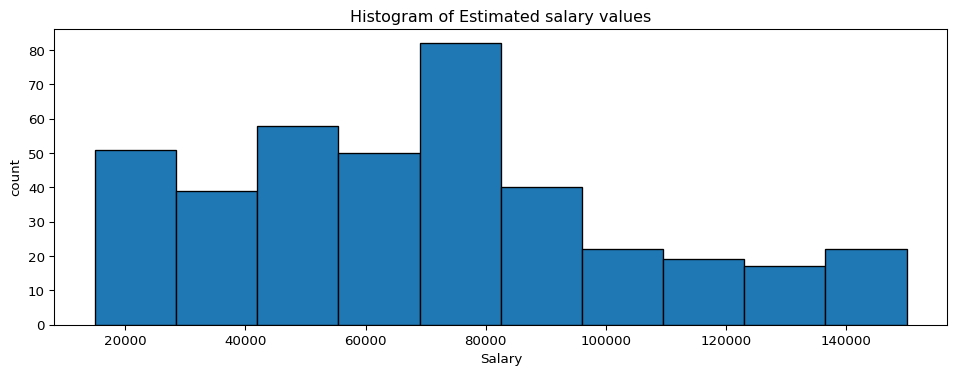

In [13]:
plt.figure(figsize = (12,4), dpi = 96)
plt.title("Histogram of Estimated salary values")
plt.xlabel("Salary")
plt.ylabel("count")
plt.hist(hp['EstimatedSalary'], bins = 'sturges', edgecolor = 'black')
plt.show()

In [16]:
hp.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

X = hp.drop(columns = 'Purchased')
y = hp['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming `hp` is your DataFrame
X = hp.drop(columns=['Purchased'])  # Features
y = hp['Purchased']  # Target variable

# One-hot encoding categorical variables (if needed)
X = pd.get_dummies(X, drop_first=True)  

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")



Training set size: (300, 4), Test set size: (100, 4)


In [26]:

hp.drop(columns=['Gender'])

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0
...,...,...,...,...
395,15691863,46,41000,1
396,15706071,51,23000,1
397,15654296,50,20000,1
398,15755018,36,33000,0


In [29]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [30]:
print(lr.score(X_train, y_train))
y_train_pred = lr.predict(X_train)

0.7833333333333333


In [33]:
print("\n Confusion Matrix")
print(confusion_matrix(y_train, y_train_pred))


 Confusion Matrix
[[186   8]
 [ 57  49]]


In [34]:
print("\n Classification Report\n")
print(classification_report(y_train, y_train_pred))


 Classification Report

              precision    recall  f1-score   support

           0       0.77      0.96      0.85       194
           1       0.86      0.46      0.60       106

    accuracy                           0.78       300
   macro avg       0.81      0.71      0.73       300
weighted avg       0.80      0.78      0.76       300

